In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## split: train 0.2 / test 0.8

In [2]:
# standard model is MPCFs from Kabbur's PhD thesis
# https://conservancy.umn.edu/bitstream/handle/11299/171241/Kabbur_umn_0130E_15806.pdf?sequence=1&isAllowed=y
no_side_info_model_metrics = pd.read_csv('data/results/2016-04-21_15.54.04_no-si_e50_tt-0.2_zero-samp-3_no-val_metrics.csv')


# model which gets regularized by doc2vec vectors from movie subtitles
# si = side information model, e50 = 50 epochs, tt-0.2 = train 0.2/test 0.8 split,
# zero-samp-3 = 3 * number of train samples taken as zero samples
side_info_model_metrics = pd.read_csv('data/results/2016-04-21_15.17.52_si_e50_tt-0.2_zero-samp-3_no-val_metrics.csv')

In [3]:
side_info_model_metrics.head()

,auc,avg_precision,f1,fcp,nb_movies_not_in_train,nb_test_movies,nb_train_movies,precision_at_20,rankings,recall_at_20,reciprocal_rank,spearman_rank_corr,user_id
0,0.915284,0.176724,0.218182,0.788618,2995,42,10,0.30,"[[1, 3, 4, 9, 14, 16, 19, 28, 32, 43, 45, 48, ...",0.171429,0.500000,0.321747,1
1,0.870127,0.219929,0.214286,0.755759,2979,103,26,0.45,"[[0, 3, 6, 8, 9, 12, 16, 17, 18, 22, 23, 24, 3...",0.140625,1.000000,0.372267,2
2,0.862564,0.101460,0.133333,0.830065,3000,18,5,0.10,"[[6, 8, 21, 25, 34, 49, 75, 91, 109, 110, 119,...",0.200000,0.142857,0.612124,12
3,0.874459,0.273490,0.213592,0.762500,2965,160,40,0.55,"[[0, 1, 2, 3, 4, 5, 6, 9, 11, 13, 15, 16, 17, ...",0.132530,1.000000,0.260608,15
4,0.844112,0.359100,0.183007,0.804016,2964,166,41,0.70,"[[0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 16, 1...",0.105263,1.000000,0.389576,17


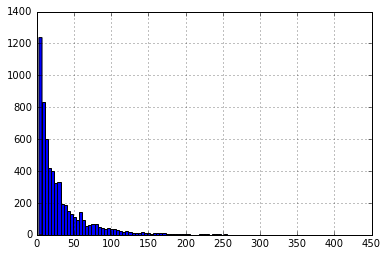

In [4]:
side_info_model_metrics['nb_train_movies'].hist(bins=100)

In [5]:
print "max number of train ratings:", side_info_model_metrics['nb_train_movies'].max()
print "min number of train ratings:", side_info_model_metrics['nb_train_movies'].min()

max number of train ratings: 418
min number of train ratings: 3


In [6]:
def get_mean_metric_per_group(df, metric, step=5):
    results = []
    max_nb_ratings = df['nb_train_movies'].max()
    start = 0
    while start < max_nb_ratings:
        end = start + step
        mask = (df['nb_train_movies'] >= start) & (df['nb_train_movies'] < end)
        results.append(df.loc[mask][metric].mean())
        start += step
    return results

In [7]:
def plot(no_si_metric, si_metric, metric_name):
    fig = plt.figure(figsize=(15,10))
    ax = plt.gca()
    ax.set_ylabel('avg {}'.format(metric_name))
    ax.set_xlabel('groups')
    ax.plot(xrange(len(no_si_metric)),no_si_metric, 'r', label='No Side Information')
    ax.plot(xrange(len(si_metric)), si_metric, 'g', label='Side Information')
    ax.legend(loc='upper right')

In [8]:
def show_metric(no_si_model_metrics, si_model_metrics, metric_name):
    no_si_metric = get_mean_metric_per_group(no_si_model_metrics, metric_name)
    si_metric = get_mean_metric_per_group(si_model_metrics, metric_name)
    plot(no_si_metric, si_metric, metric_name)
    print "avg {} for standard model:\t".format(metric_name), no_si_model_metrics[metric_name].mean()
    print "avg {} for side info model:\t".format(metric_name), si_model_metrics[metric_name].mean()

avg auc for standard model:	0.832635376426
avg auc for side info model:	0.849357499917


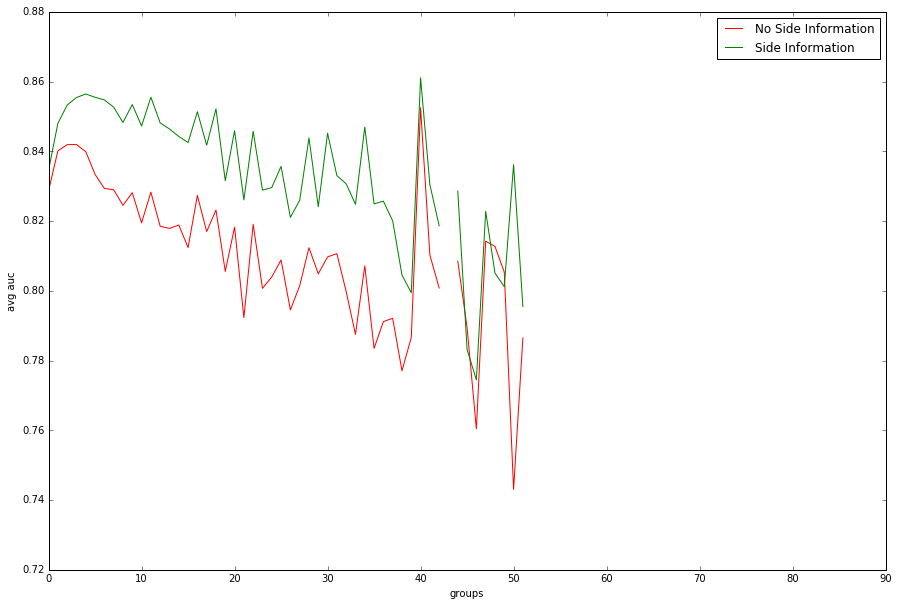

In [9]:
show_metric(no_side_info_model_metrics, side_info_model_metrics, 'auc')

Group 0: avg AUC of users who have 0-5 training ratings

Group 1: avg AUC of users who have 5-10 training ratings

...

avg avg_precision for standard model:	0.18999476135
avg avg_precision for side info model:	0.213058958103


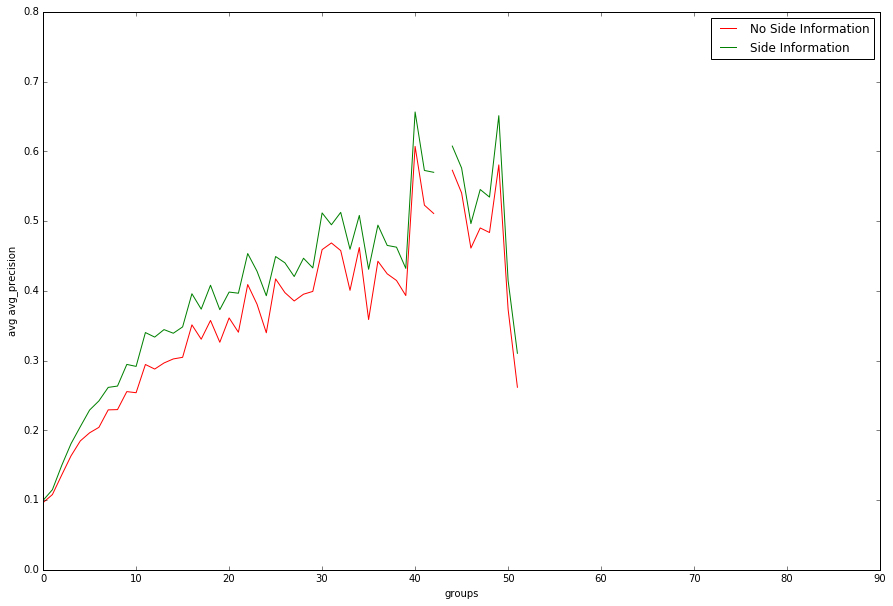

In [10]:
show_metric(no_side_info_model_metrics, side_info_model_metrics, 'avg_precision')

avg f1 for standard model:	0.142560533849
avg f1 for side info model:	0.152893422722


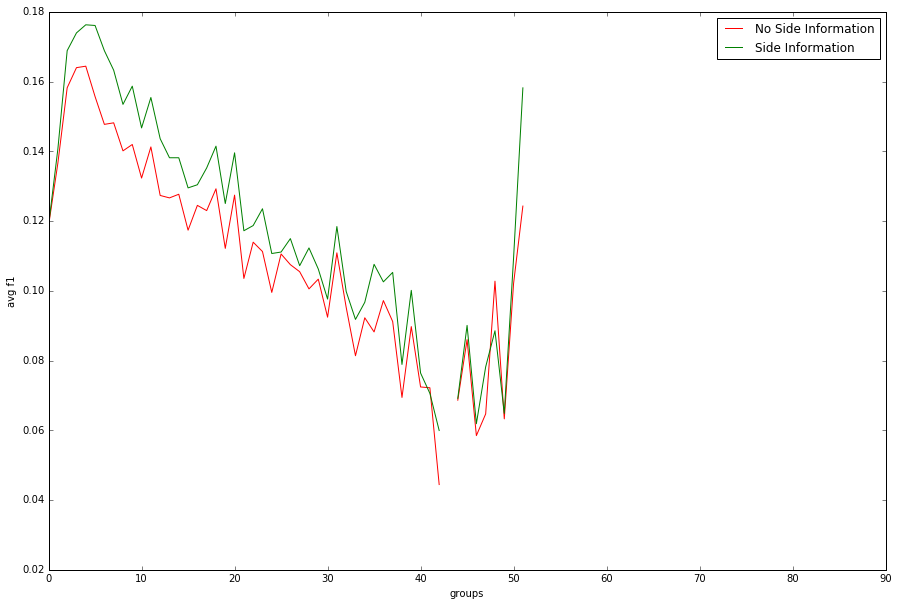

In [11]:
show_metric(no_side_info_model_metrics, side_info_model_metrics, 'f1')

avg precision_at_20 for standard model:	0.313435430464
avg precision_at_20 for side info model:	0.340471854305


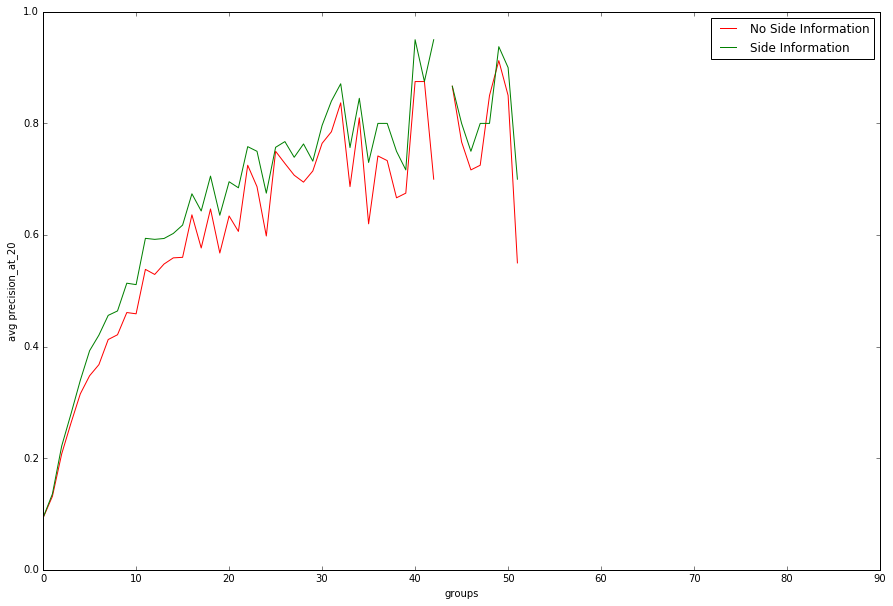

In [12]:
show_metric(no_side_info_model_metrics, side_info_model_metrics, 'precision_at_20')

avg recall_at_20 for standard model:	0.115165773912
avg recall_at_20 for side info model:	0.122272253017


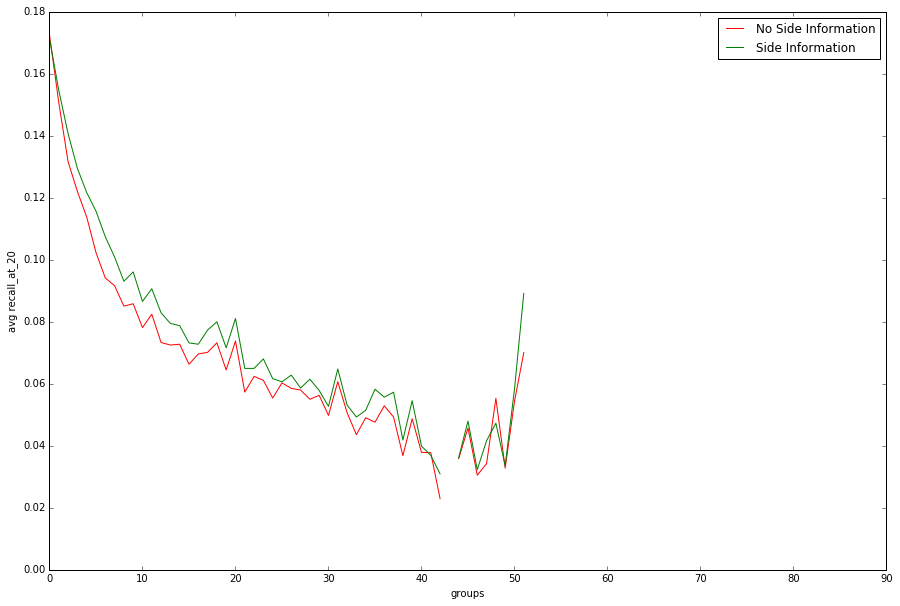

In [13]:
show_metric(no_side_info_model_metrics, side_info_model_metrics, 'recall_at_20')

avg fcp for standard model:	0.746979830142
avg fcp for side info model:	0.752044267895


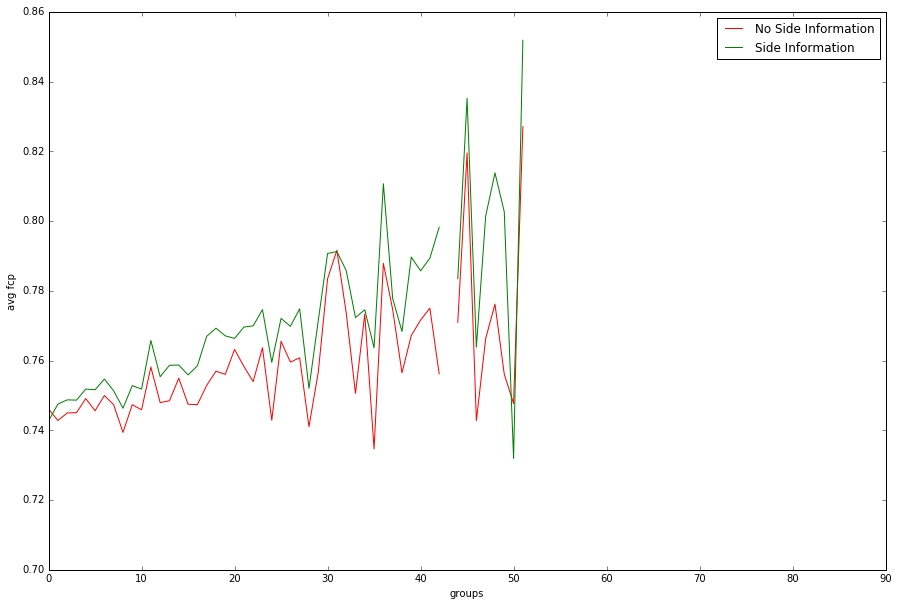

In [14]:
# Fraction of Concordant Pairs
show_metric(no_side_info_model_metrics, side_info_model_metrics, 'fcp')

avg spearman_rank_corr for standard model:	0.283687844133
avg spearman_rank_corr for side info model:	0.298850355128


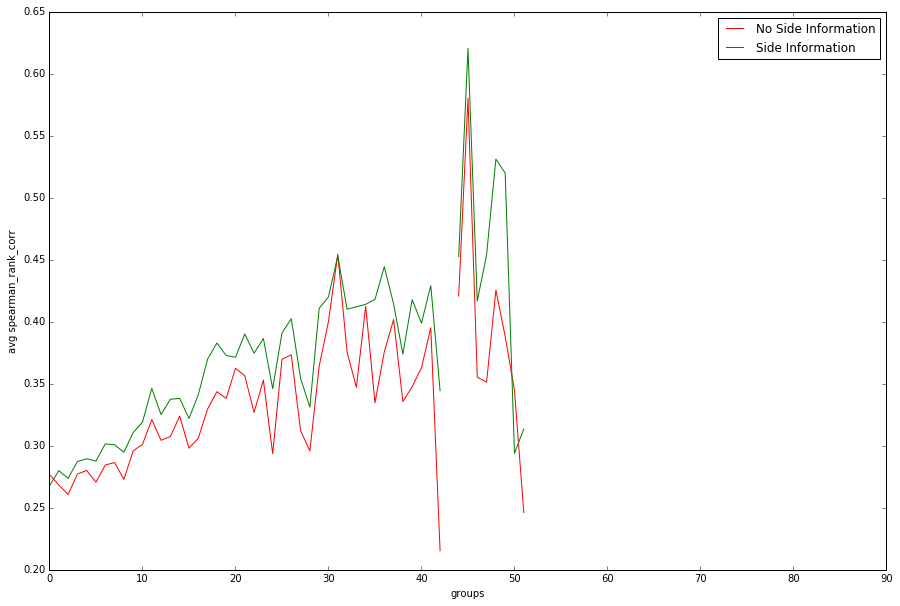

In [15]:
show_metric(no_side_info_model_metrics, side_info_model_metrics, 'spearman_rank_corr')

avg reciprocal_rank for standard model:	0.585965946032
avg reciprocal_rank for side info model:	0.642350838322


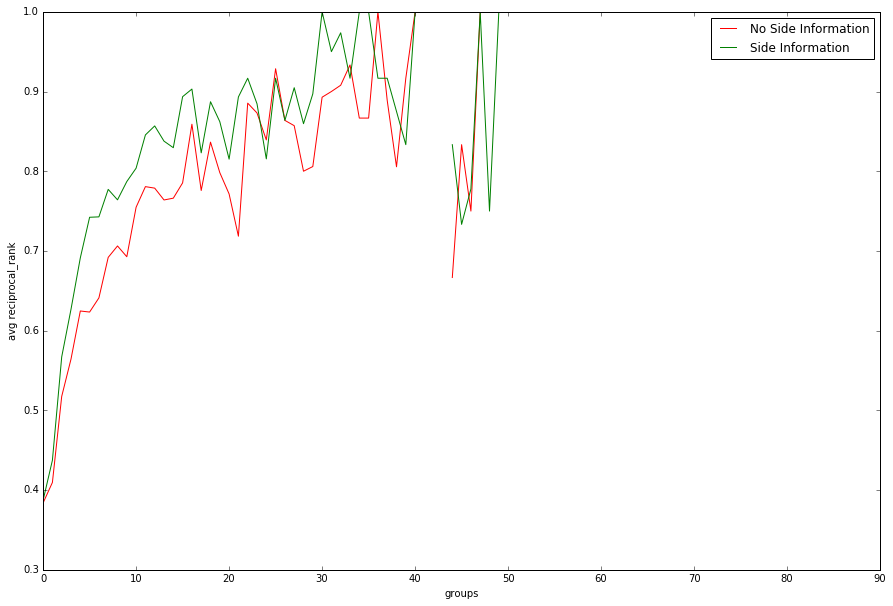

In [16]:
show_metric(no_side_info_model_metrics, side_info_model_metrics, 'reciprocal_rank')